#Sentiment Analysis using DistilBERT

**Processings carried out:**
- Loading the pre-trained DistilBERT model and tokenizer
- Loading the DistilBERT sentiment analysis pipeline
- Exploratory data analysis

In order to import the DistilBERT model, the Hugging face transformers library can be used, which provides a convenient interface to work with various pre-trained transformer models including DistilBERT.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install wordcloud matplotlib
%matplotlib inline

In [3]:
#loading the csv file without the headers
df=pd.read_csv('/content/ch4_feedback_data.csv',header=None)
df.head()

,0,1
0,Your products are excellent. I really love the...,delivery to my location in Los Angeles was a ...
1,The customer service team in New York was help...,NaN
2,The new features in the latest release are fan...,NaN
3,The product didn't meet my expectations,and I'm disappointed. I hope you can address ...
4,Your products are not good. I really don't lik...,delivery to my location in Los Angeles was a ...


###Loading the pre-trained DistilBERT model and tokenizer

In [4]:
from transformers import pipeline,DistilBertModel, DistilBertTokenizer
model=DistilBertModel.from_pretrained('distilbert-base-uncased')
tokenizer=DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

###Load DistilBERT Sentiment Analysis Pipeline

In [6]:
#load DistilBERT sentiment analysis pipeline
sentiment_analysis_bert=pipeline("sentiment-analysis",model="nlptown/bert-base-multilingual-uncased-sentiment")

#iterate over the rows and perform sentiment analysis with DistilBERT
sentiment_results_bert=[]
for index,row in df.iterrows():
  text=row[0]
  bert_result=sentiment_analysis_bert(text)[0]
  sentiment_label_bert=bert_result['label']
  sentiment_score_bert=bert_result['score']
  sentiment_results_bert.append({"Text":text, "Sentiment Score": sentiment_score_bert, "Sentiment Label": sentiment_label_bert})

#iterate over the sentiment results and print each entry
for result in sentiment_results_bert:
  print(f"Text: {result['Text']}")
  print(f"Sentiment Score:{result['Sentiment Score']}")
  print(f"Sentiment Label:{result['Sentiment Label']}")
  print()

#convert distilBERT sentiment results to dataframe
sentiment_df_bert=pd.DataFrame(sentiment_results_bert)

#save distilbert sentiment results to a new csv file
sentiment_df_bert.to_csv("sentiment_results_bert.csv",index=False)


Text: Your products are excellent. I really love the quality! However
Sentiment Score:0.574426531791687
Sentiment Label:5 stars

Text: The customer service team in New York was helpful in resolving my issue. I appreciate the assistance. brian@email.com
Sentiment Score:0.5543171763420105
Sentiment Label:4 stars

Text: The new features in the latest release are fantastic! They have greatly improved the user experience in San Francisco.
Sentiment Score:0.8357024192810059
Sentiment Label:5 stars

Text: The product didn't meet my expectations
Sentiment Score:0.4780275821685791
Sentiment Label:2 stars

Text: Your products are not good. I really don't like the quality! However
Sentiment Score:0.5138061046600342
Sentiment Label:2 stars

Text: The customer service team in San Francisco was not helpful in resolving my issue. But
Sentiment Score:0.5047702193260193
Sentiment Label:3 stars

Text: The new features in the latest release are not fantastic! They have not greatly improved the user exper

###Exploratory Data Analysis

In [7]:
sentiment_df_bert.head()

,Text,Sentiment Score,Sentiment Label
0,Your products are excellent. I really love the...,0.574427,5 stars
1,The customer service team in New York was help...,0.554317,4 stars
2,The new features in the latest release are fan...,0.835702,5 stars
3,The product didn't meet my expectations,0.478028,2 stars
4,Your products are not good. I really don't lik...,0.513806,2 stars


####Word Cloud

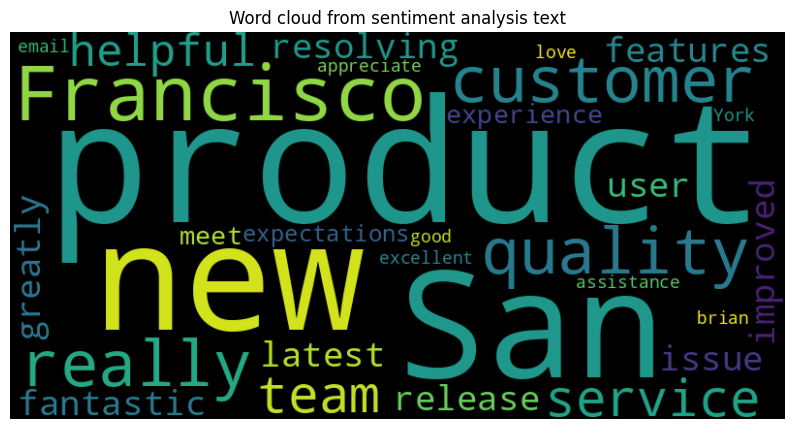

In [8]:
from wordcloud import WordCloud

#combining all the text data into a single string for word cloud generation
text_combined=' '.join(sentiment_df_bert['Text'])

wordcloud= WordCloud(width=800,height=400,background_color='black',colormap="viridis").generate(text_combined)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Word cloud from sentiment analysis text")
plt.show()

####Pie chart

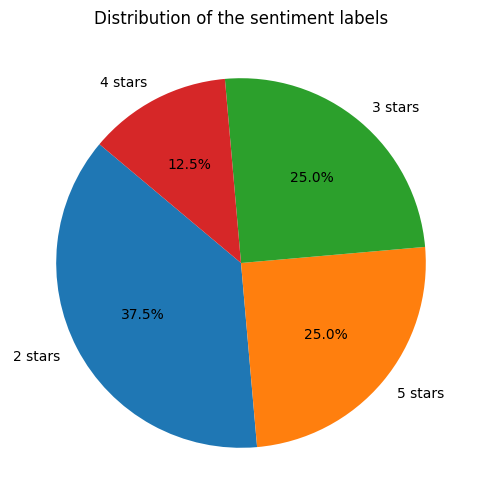

In [10]:
#counting the occurrences of each sentiment label
sentiment_label_count= sentiment_df_bert['Sentiment Label'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(sentiment_label_count,labels=sentiment_label_count.index,autopct='%1.1f%%',startangle=140)
plt.title('Distribution of the sentiment labels')
plt.show()


####Bar graph

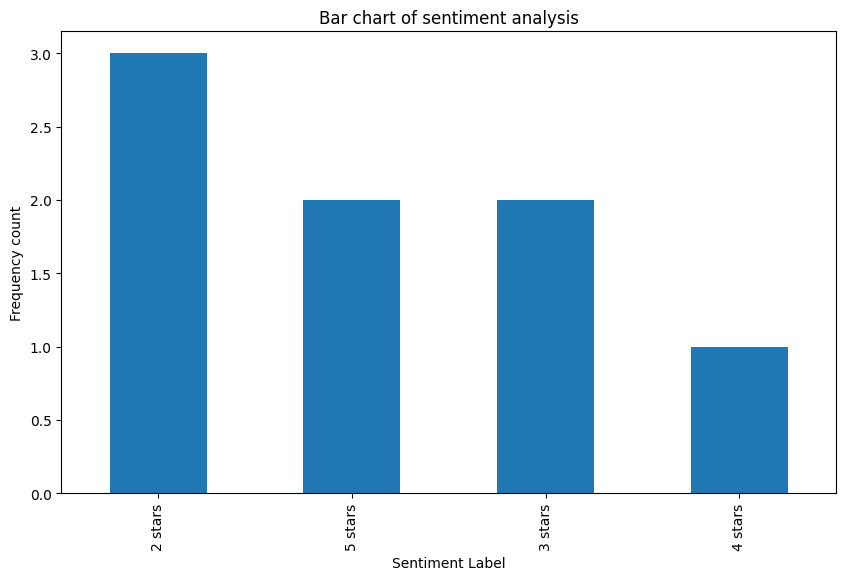

In [11]:
sentiment_label_count=sentiment_df_bert['Sentiment Label'].value_counts()
plt.figure(figsize=(10,6))
sentiment_label_count.plot(kind='bar',stacked=True)
plt.title('Bar chart of sentiment analysis')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency count')
plt.show()